In [ ]:
#@markdown #Import the required componets

from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.models import load_model
import matplotlib.pyplot as plt
from matplotlib import pyplot
from google.colab import drive
import numpy as np
import sklearn.linear_model as linear_model
from IPython.display import clear_output
drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/generator/Models

Mounted at /content/gdrive
/content/gdrive/MyDrive/generator/Models


In [ ]:
#@markdown #Generate points in latent space as input for the generator

def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space (Gaussian Distribution)
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the generator
	z_input = x_input.reshape(n_samples, latent_dim)
	return z_input

# load model
model_male = load_model('male_generator_model.h5')
model_female = load_model('female_generator_model.h5')
# generate latent points
latent_points = generate_latent_points(100, 100)
# generate images
X_male  = model_male.predict(latent_points)
X_female  = model_female.predict(latent_points)

clear_output()

latents=np.array(latent_points)
#print(latents.shape)

In [ ]:
#@markdown #Input attributes with speech recognition

%cd /content/gdrive/MyDrive/speechrecognition

!pip install speechrecognition
import speech_recognition as sr

clear_output()

Q: Describe the person. Tell us about his/her sex, the size of the lips, the size of the nose, distance between eyes, and the hair style.
Please answer like the form below.

Example:
The person is a (male/female).
He/She has (big/small) lips, a (big/small) nose, (narrow/wide) eyes, and he/she (is bald)/(has (hair color) and (wavy/straight) hair).

In [ ]:
#@markdown #Listing attributes

attributes=[]
attributes1=[]
attributes2=[]  #test attributes2

r = sr.Recognizer()

#male: example sentence recognition error
'''
male = sr.AudioFile('/content/gdrive/MyDrive/speechrecognition/male4.wav')
with male as source:
  audio1 = r.record(source)
print("A: "+r.recognize_google(audio1)+"\n")


sentence=r.recognize_google(audio1)
s=sentence.split(" ")

for word in s:
  if word == 'lips' or word == 'nose' or word == 'eyes' or word == 'hair':
    keyword1=s[s.index(word)-1].capitalize()+'_'+word.capitalize()
    print(keyword1)
    if s[s.index(word)-1]!='small' and s[s.index(word)-1]!='distant':
      attributes1.append(keyword1)
  if word == 'bald' or word == 'young':
    keyword2=word.capitalize()
    print(keyword2)
    attributes1.append(keyword2)

print(attributes1)
'''

female = sr.AudioFile('/content/gdrive/MyDrive/speechrecognition/female1.wav')
with female as source:
  audio2 = r.record(source)

sentence=r.recognize_google(audio2)
s2=sentence.split(" ")

print("\nA: ",*s2,"\n")

for word in s2:
  if word == 'female':
    sex='female'
  elif word == 'male':
    sex='male'
  elif word == 'lips' or word == 'nose' or word == 'eyes':
    keyword1=s2[s2.index(word)-1].capitalize()+'_'+word.capitalize()
    print(keyword1)
    if s2[s2.index(word)-1]!='small' and s2[s2.index(word)-1]!='distant':
      attributes1.append(keyword1)
  elif word == 'bald' or word == 'young':
    keyword2=word.capitalize()
    print(keyword2)
    attributes1.append(keyword2)
  elif word == 'hair':
    keyword3=s2[s2.index(word)-3].capitalize()+'_'+word.capitalize()
    keyword4=s2[s2.index(word)-1].capitalize()+'_'+word.capitalize()
    print(keyword3)
    print(keyword4)
    attributes1.append(keyword3)
    attributes1.append(keyword4)

print(sex)
print('Attributes: ', *attributes1)

result2:
{   'alternative': [   {   'confidence': 0.96272057,
                           'transcript': 'the person is a female she has big '
                                         'lips small nose narrow eyes and she '
                                         'has blonde and wavy'},
                       {   'transcript': 'the person is a female she has big '
                                         'lips small nose narrow eyes and she '
                                         'has blonde and wavy hair'},
                       {   'transcript': 'the person is a female she has big '
                                         'lips small nose eyes and she has '
                                         'blonde and wavy'},
                       {   'transcript': 'the person is a female she is big '
                                         'lips small nose narrow eyes and she '
                                         'has blonde and wavy'},
                       {   'transcript': 'the

In [ ]:
#@markdown #Load model files for each attributes

%cd /content/gdrive/MyDrive/generator/AML-Proj-Attributes

final_preds_male=np.zeros(100)
for x in range(len(attributes)):
  # Generate model names
  st='/content/gdrive/My Drive/generator/AML-Proj-Attributes/'+attributes[x]+'_Model.h5'
  model=load_model(st)
  prediction=model.predict(X_male)
  att_val=[]
  for i in range(100):
    # Our CNN gives 2 values as output
    if prediction[i]>prediction[i]:  
      att_val.append(prediction[i])
    else:
      att_val.append(-prediction[i])
  arr=np.asarray(att_val)
  # Stacking all attribute columns to make one final attribute predictions array
  final_preds_male=np.column_stack((final_preds_male,arr))

for x in range(len(attributes1)):
  st='/content/gdrive/MyDrive/generator/AML-Proj-Attributes/'+attributes1[x]+'_Model.h5'
  model=load_model(st)
  prediction=model.predict(X_male)
  att_val=[]
  for i in range(100):
      att_val.append(prediction[i])
  arr=np.asarray(att_val)
  final_preds_male=np.column_stack((final_preds_male,arr))
print(arr)

final_preds_female=np.zeros(100)
for x in range(len(attributes)):
  st='/content/gdrive/MyDrive/generator/AML-Proj-Attributes/'+attributes[x]+'_Model.h5'
  model=load_model(st)
  prediction=model.predict(X_female)
  att_val=[]
  for i in range(100):
    if prediction[i]>prediction[i]:
      att_val.append(prediction[i])
    else:
      att_val.append(-prediction[i])
  arr=np.asarray(att_val)
  final_preds_female=np.column_stack((final_preds_female,arr))

for x in range(len(attributes1)):
  st='/content/gdrive/MyDrive/generator/AML-Proj-Attributes/'+attributes1[x]+'_Model.h5'
  model=load_model(st)
  prediction=model.predict(X_female)
  att_val=[]
  for i in range(100):
      att_val.append(prediction[i])
  arr=np.asarray(att_val)
  final_preds_female=np.column_stack((final_preds_female,arr))

z=latents
y_male=final_preds_male
y_female=final_preds_female
# Removing the zero column
y_male=np.delete(y_male,0,1)
y_female=np.delete(y_female,0,1)
print(z.shape)

attributes=attributes1

clear_output()

In [ ]:
#@markdown #Define the regression model

def find_feature_axis(z, y):
  model_reg = linear_model.LinearRegression()
  print("Z",z.shape)
  print("y",y.shape)
  model_reg.fit(z, y)
  return model_reg.coef_.transpose()

def normalize_feature_axis(feature_slope):
    feature_direction = feature_slope / np.linalg.norm(feature_slope, ord=2, axis=0, keepdims=True)
    return feature_direction

# regression: use latent space z to predict features y
feature_slope = find_feature_axis(z, y_male)

# normalize the feature vectors
feature_direction = normalize_feature_axis(feature_slope)

# regression: use latent space z to predict features y
feature_slope = find_feature_axis(z, y_female)

# normalize the feature vectors
feature_direction = normalize_feature_axis(feature_slope)

clear_output()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

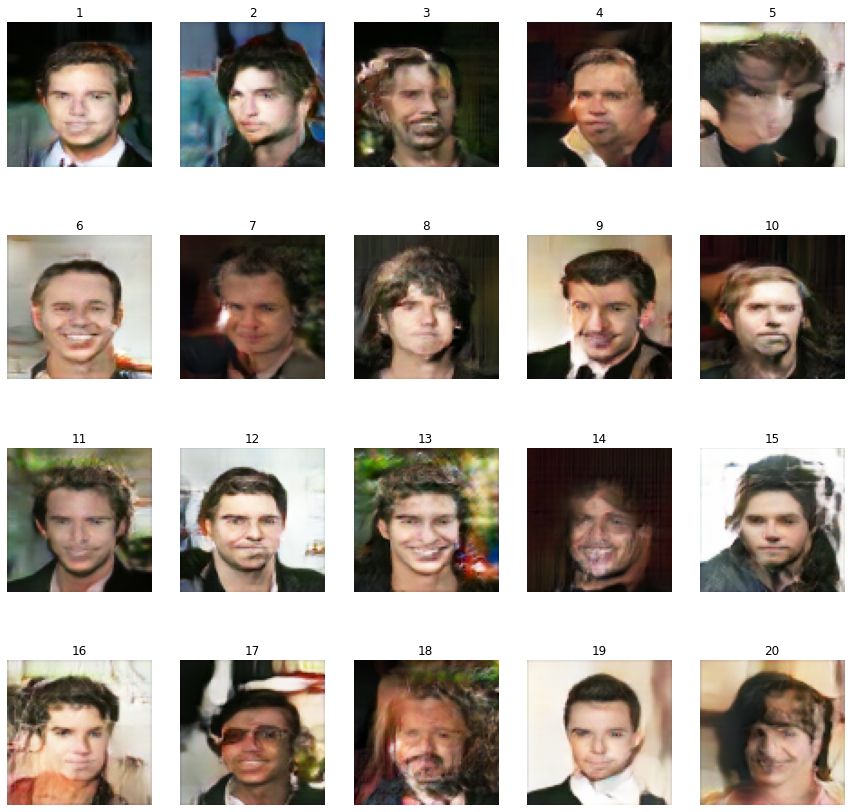

In [ ]:
#@markdown #Generate 20 male face images

import skimage.transform
latent_points=generate_latent_points(100,20)
images = model_male.predict(latent_points)

w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 4
k=0
for i in range(1, columns*rows +1):
  fig.add_subplot(rows, columns, i)
  plt.axis('off')
  plt.title(i)
  plt.imshow(images[k])
  k=k+1
plt.show()

19


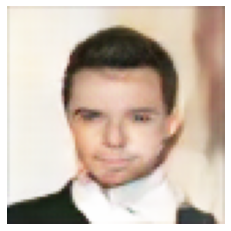

In [ ]:
#@markdown #Choose one from images shown above

x=int(input())

plt.axis('off')
plt.imshow(images[x-1])
plt.savefig('/content/gdrive/MyDrive/generator/output/gen_output.png', bbox_inches='tight', pad_inches = 0)

1/1 [==============================] - 1s 517ms/step


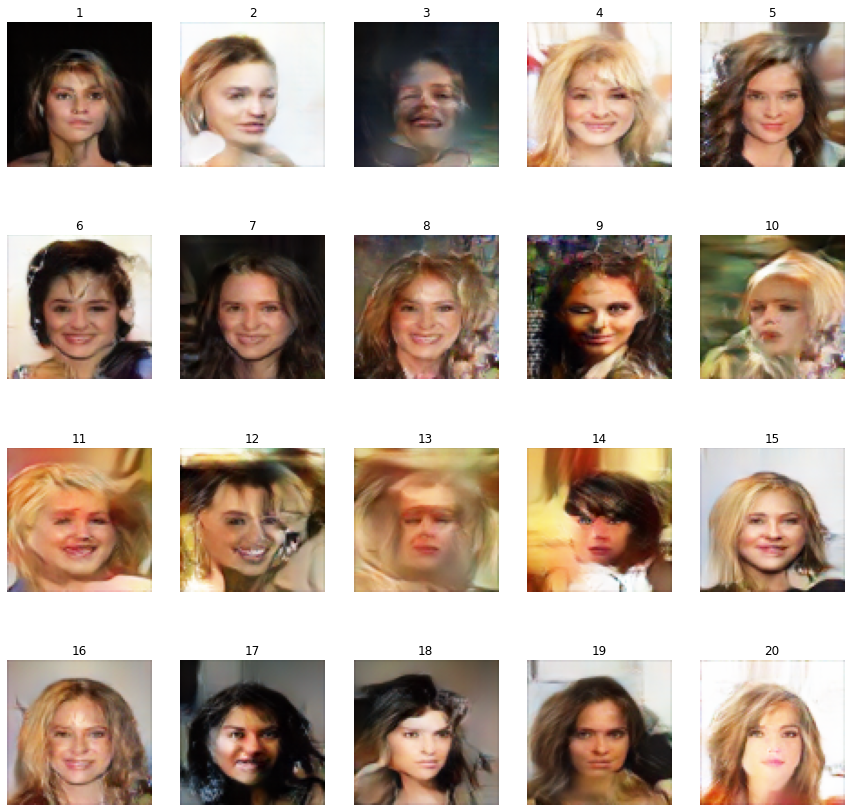

In [ ]:
#@markdown #Generate 20 female face images

import skimage.transform
latent_points=generate_latent_points(100,20)
images = model_female.predict(latent_points)

w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 4
k=0
for i in range(1, columns*rows +1):
  fig.add_subplot(rows, columns, i)
  plt.axis('off')
  plt.title(i)
  plt.imshow(images[k])
  k=k+1
plt.show()

20


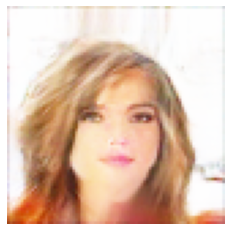

In [ ]:
#@markdown #Choose one from images shown above

x=int(input())

plt.axis('off')
plt.imshow(images[x-1])
plt.savefig('/content/gdrive/MyDrive/generator/output/gen_output.png', bbox_inches='tight', pad_inches = 0)

seed: 930
Loading Synthesis Network
Optimizing
BEST (100) | L2: 0.0200 | GEOCROSS: 9.7256 | TOTAL: 2.4863 | time: 24.5 | it/s: 4.08 | batchsize: 1


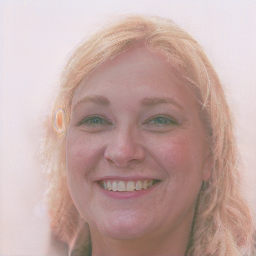

seed: 334
Loading Synthesis Network
Optimizing
BEST (100) | L2: 0.0200 | GEOCROSS: 16.9114 | TOTAL: 2.8456 | time: 20.4 | it/s: 4.89 | batchsize: 1


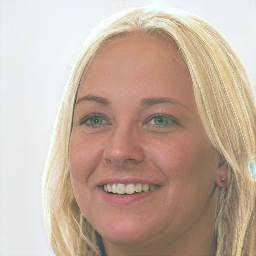

seed: 148
Loading Synthesis Network
Optimizing
BEST (100) | L2: 0.0200 | GEOCROSS: 7.5369 | TOTAL: 2.3768 | time: 20.0 | it/s: 4.99 | batchsize: 1


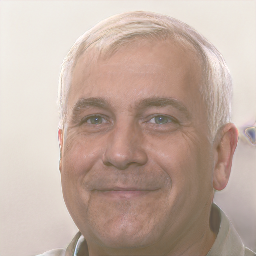

seed: 321
Loading Synthesis Network
Optimizing
BEST (100) | L2: 0.0200 | GEOCROSS: 4.4936 | TOTAL: 2.2247 | time: 19.5 | it/s: 5.14 | batchsize: 1


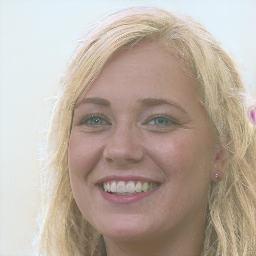

3


True

In [ ]:
#Depixelizer:
#@markdown #Generate random high-definition images similar to the input image

%cd /content/gdrive/MyDrive/depixelizer

import torch
import torchvision
from pathlib import Path
if not Path("PULSE.py").exists():
  if Path("pulse").exists():
    %cd /content/pulse
  else:
    !git clone https://github.com/adamian98/pulse
    %cd /content/pulse
    !mkdir input/
    toPIL = torchvision.transforms.ToPILImage()
    toTensor = torchvision.transforms.ToTensor()
    from bicubic import BicubicDownSample
    D = BicubicDownSample(factor=1)

import os
from io import BytesIO
import matplotlib.image as mpimg
from PIL import Image
from PULSE import PULSE
from google.colab import files
from bicubic import BicubicDownSample
from IPython import display
from IPython.display import display
from IPython.display import clear_output
from drive import open_url
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

import random
import cv2
from google.colab.patches import cv2_imshow

toPIL = torchvision.transforms.ToPILImage()
toTensor = torchvision.transforms.ToTensor()
from bicubic import BicubicDownSample
D = BicubicDownSample(factor=1)

!rm -rf /content/gdrive/MyDrive/depixelizer/pulse/input/face.png
clear_output()

face = Image.open('/content/gdrive/MyDrive/generator/output/gen_output.png')
face = face.resize((1024, 1024), Image.ANTIALIAS)
face = face.convert('RGB')
face_name = 'face.png'
face.save(face_name)
%cp $face_name /content/gdrive/MyDrive/depixelizer/pulse/input/

images = []
imagesHR = []
imagesHR.append(face)
face = toPIL(D(toTensor(face).unsqueeze(0).cuda()).cpu().detach().clamp(0,1)[0])
images.append(face)

#@markdown ###Settings:

input_dir = '/content/gdrive/MyDrive/depixelizer/pulse/input/'
output_dir = '/content/gdrive/MyDrive/depixelizer/pulse/runs/'
seed = 1000 #@param {type:"integer"}
epsilon = 0.02 #@param {type:"slider", min:0.01, max:0.03, step:0.01}
noise_type = 'trainable'  #@param ['zero', 'fixed', 'trainable']
optimizer = 'adamax'  #@param ['sgd', 'adam','sgdm', 'adamax']
learning_rate = 0.4 #@param {type:"slider", min:0, max:1, step:0.05}
learning_rate_schedule = 'linear1cycledrop'  #@param ['fixed', 'linear1cycle', 'linear1cycledrop']
steps = 100 #@param {type:"slider", min:100, max:2000, step:50}
clear_output()

for i in range(4):
  seed = random.randrange(1,1000)
  print('seed: '+str(seed))
  #print('Estimated Runtime: {}s.\n'.format(round(0.23*steps)+6))
  !python run.py \
    -input_dir $input_dir \
    -output_dir $output_dir \
    -seed $seed \
    -noise_type $noise_type \
    -opt_name $optimizer \
    -learning_rate $learning_rate \
    -steps $steps \
    -eps $epsilon \
    -lr_schedule $learning_rate_schedule
  
  ori = cv2.imread('/content/gdrive/MyDrive/depixelizer/pulse/runs/face.png')
  img = cv2.resize(ori, dsize=(256,256))
  cv2.imwrite('/content/gdrive/MyDrive/depixelizer/output/img'+str(i)+'.png', ori)
  cv2_imshow(img)

x=input()
out=cv2.imread('/content/gdrive/MyDrive/depixelizer/output/img'+str(x)+'.png')
cv2.imwrite('/content/gdrive/MyDrive/stylegan/raw_images/photo.png', out)